In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataclasses import dataclass
from typing import List

In [407]:
@dataclass(init=True)
class Plot:
    
    colors: List

    def relationship(self, data, x, y, color=None):
        color_ = np.random.choice(self.colors) if not color else color
        plt.plot(data[x], data[y], 'o', label=f'{x} - {y}', color=color_)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend();

*get_features* function is helpful whenever you need, something like:

What is the maximum amount of money spent on films where played actor **X**.

In [408]:
def get_features(dataframe, col_name, based_on, func, **kwargs):
    features = dataframe[col_name].unique()
    
    feature_mask = [(dataframe[col_name] == feature, feature) for feature in features]
    means = [(feature, func(dataframe[based_on][mask], **kwargs)) for mask, feature in feature_mask]

    return sorted(means, key=lambda x: x[1], reverse=True)

Few examples using *get_features* function.

In [409]:
fake_df = pd.DataFrame({'films': ['movie1', 'movie2', 'movie3', 'movie4'], 
                        'actors': ['actor1', 'actor1', 'actor2', 'actor2'],
                       'revenue': [100, 200, 300, 400]})
fake_df

,films,actors,revenue
0,movie1,actor1,100
1,movie2,actor1,200
2,movie3,actor2,300
3,movie4,actor2,400


Get movie names where the revenues are the highest (sorted from best to worst).

In [410]:
get_features(fake_df, 'films', 'revenue', np.max)

[('movie4', 400), ('movie3', 300), ('movie2', 200), ('movie1', 100)]

Get the most expansive movie for every actor, who played in it.

In this case *actor2* played in two films (in *movie3* and *movie4*), 
but the *revenue* of *movie3* is higher, and the same happend for *actor1*
and for every actor in the column as shown below.

In [411]:
get_features(fake_df, 'actors', 'revenue', np.max)

[('actor2', 400), ('actor1', 200)]

Load data.

In [412]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [413]:
train_data

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [414]:
train_data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

Make a copy of *train_data* and *test_data* for not modifing them.

In [415]:
train_df = train_data.copy()
test_df = test_data.copy()

# checking the ids
np.any((id(train_df) == id(train_data)) and (id(test_df) == id(test_data)))

False

### Preprocess, visualize and analyze data.

Initialize *Plot* for ploting with less typing.

In [416]:
plot = Plot(colors=['red', 'blue', 'green']) # more colors can be added if needed

In [417]:
# preprocess data for ploting
train_df.homepage = train_df.homepage.replace(np.nan, 0)
train_df.homepage = train_df.homepage.replace({'http': 1}, regex=True)

np.any(train_df.homepage == np.nan), train_df.homepage.dtype

(False, dtype('int64'))

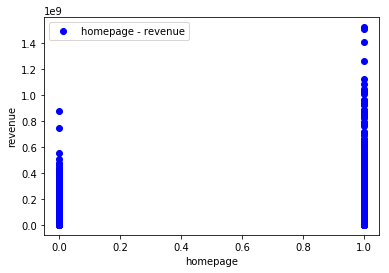

In [418]:
plot.relationship(train_df, x='homepage', y='revenue')

The values of *imdb_id* column does not have that much impact on *revenue* as shown in the graph.

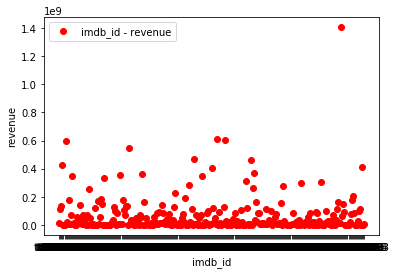

In [419]:
plot.relationship(train_df[::10], x='imdb_id', y='revenue', color='red')

It is clear that movies in *English* have higher revenue.

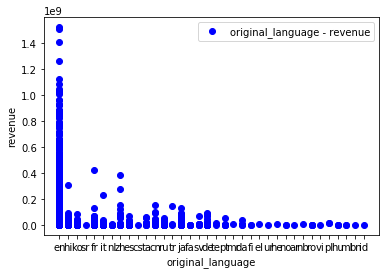

In [420]:
plot.relationship(train_df, 'original_language', 'revenue')

In [405]:
get_features(train_df, 'original_language', 'revenue', np.mean)[:5]

[('en', 74665908.71145631),
 ('zh', 70376369.15789473),
 ('tr', 51663408.333333336),
 ('ja', 30651798.81081081),
 ('cn', 29772885.25)]